<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-13-Friday" data-toc-modified-id="Week-13-Friday-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 13 Friday</a></span></li><li><span><a href="#-Last-Time-" data-toc-modified-id="-Last-Time--2"><span class="toc-item-num">2&nbsp;&nbsp;</span> Last Time </a></span><ul class="toc-item"><li><span><a href="#-This-is-an-equation-for-convolution!-" data-toc-modified-id="-This-is-an-equation-for-convolution!--2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span> This is an equation for convolution! </a></span></li></ul></li><li><span><a href="#Last-Time:" data-toc-modified-id="Last-Time:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Last Time:</a></span></li><li><span><a href="#As-an-algorithm-(Python-pseudocode):" data-toc-modified-id="As-an-algorithm-(Python-pseudocode):-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>As an algorithm (Python pseudocode):</a></span></li><li><span><a href="#Implemented-as-actual-Python-code:" data-toc-modified-id="Implemented-as-actual-Python-code:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Implemented as actual Python code:</a></span></li><li><span><a href="#How-do-measurements-influence-our-belief?" data-toc-modified-id="How-do-measurements-influence-our-belief?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>How do measurements influence our belief?</a></span></li><li><span><a href="#Conditional-Probability:-Demo" data-toc-modified-id="Conditional-Probability:-Demo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><a href="https://setosa.io/conditional/" rel="nofollow" target="_blank">Conditional Probability: Demo</a></a></span></li><li><span><a href="#Conditional-Probability" data-toc-modified-id="Conditional-Probability-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conditional Probability</a></span><ul class="toc-item"><li><span><a href="#The-Law-of-Total-Probability:-&quot;We-must-be-somewhere&quot;" data-toc-modified-id="The-Law-of-Total-Probability:-&quot;We-must-be-somewhere&quot;-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>The Law of Total Probability: "We must be somewhere"</a></span></li><li><span><a href="#Rearranging-the-law-of-conditional-probability-gives-us-something-special:" data-toc-modified-id="Rearranging-the-law-of-conditional-probability-gives-us-something-special:-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Rearranging the law of conditional probability gives us something special:</a></span></li></ul></li><li><span><a href="#Classic-Bayes's-rule-example:" data-toc-modified-id="Classic-Bayes's-rule-example:-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Classic Bayes's rule example:</a></span></li><li><span><a href="#What's-next?" data-toc-modified-id="What's-next?-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>What's next?</a></span></li><li><span><a href="#WORK-TIME!" data-toc-modified-id="WORK-TIME!-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>WORK TIME!</a></span></li></ul></div>

## Week 13 Friday
Friday, Nov 22

**Announcements**
* A09 Assigned: Due Monday, Dec 2
* A10 Assigned: Due Friday, Dec 13

**Goals** 
* Introduction to probabilistic occupancy: Part 2
* Work time

<div style="width: 40%;height: 75%; float: left;"> <h2> Last Time </h2><img src="figures/week13-convolution.png"/> </div> 
<div style="width: 50%;height:75%; float:right;">
    <h3> This is an equation for convolution! </h3>
    $$Bel(j)_k = \sum_{i=0}^{p-1} H(i)\cdot Bel\left(j+i-\frac{p-1}{2}\right)_{k-1}$$
    <hr>
    our PDF $H$ with length $p$ is a "kernel" that we convolve over the prior belief to obtain an updated belief that accounts  for the additional uncertainty in our latest prediction. As time goes on, we get more and more uncertain.
    <hr>
    <strong> How do we fix this? Using measurements to reduce uncertainty!</strong>
</div>

## Last Time:
* Given a PDF of size $p$, $H = \begin{bmatrix} H_0 & H_1 & \ldots & H_{p-1} \end{bmatrix}$
* Given a Belief grid of size $m$, spanning $d$ meters: $Bel = \begin{bmatrix} Bel_0 & Bel_1 & \ldots & Bel_{m-1} \end{bmatrix}$
* We can predict how uncertainty progresses due to model uncertainty at each timestep by convolving $H$ with $Bel$

## As an algorithm (Python pseudocode):
---
**for all timesteps k do:**
* $\hat{x}_k = f(\hat{x}_{k-1},u_{k-1})\leftarrow$ update model prediction

* $\hat{j}_{k} = int\left(\frac{m}{d}\left(\hat{x}_k -\frac{d}{2m} \right) \right)\leftarrow$ update cell estimate
* $\Delta j = \hat{j}_k-\hat{j}_{k-1}\leftarrow$ update shift
* $Bel_{old} = Bel \leftarrow$ copy belief from prior timestep
* for b in range(max(0,$\Delta j$),min(m+$\Delta j$,m)):
  * $Bel(j+\Delta j) = Bel_{old}(j)\leftarrow$ shift belief
* for r in range(0,m):
  * $Bel[r]_{k}= \sum_{i=0}^{p-1} H[r]\cdot Bel\left[r+i-\frac{p-1}{2}\right]\leftarrow$ update belief
* $\hat{j}_k = argmax(Bel)\leftarrow$ most likely estimate
* $\hat{x}_k = \hat{j}_k\frac{d}{m} + \frac{d}{2m}\leftarrow$ convert back to an estimate in true units

.

.

.

.

.

## Implemented as actual Python code:

H = [0.3 0.4 0.3]


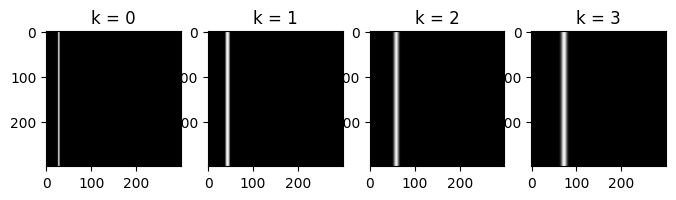

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#function to update dynamics
def updateMotion(x,u):
    #just a simple model for now
    x = x+u
    return x


#function to get the index j in Bel given an x.
def getCell(x,Bel,d):
    m = np.size(Bel)
    j = int((x-d/(2*m))*m/d)
    return j

#function to shift Bel probabilities given delta_j
def shiftBelief(Bel,delta_j):
    m= np.size(Bel)
    #copy the Bel to keep an old copy
    Belold = Bel
    Bel = np.zeros(np.size(Bel))
    #now loop through and shift
    #print("delta_j = "+str(delta_j))
    #print(range(max([0,delta_j]),min(m-delta_j,m)))
    for j in range(max([0,delta_j]),min(m-delta_j,m)):
        # print("j="+str(j))
        Bel[j+delta_j]=Belold[j]
    return Bel

#function to get the x coordinate of most likely j's center
def getEstimate(j,Bel,d):
    m = np.size(Bel)
    x = j*d/m + d/(2*m)
    return x

# Function to display our belief histogram
def dispBel(Bel):
    #create an image to display to show us our belief
    Bel_image = np.array([Bel])
    Bel_image = np.dot(np.ones((np.size(Bel),1)),Bel_image)
    Bel_image = cv2.resize(Bel_image,(3*np.size(Bel),3*np.size(Bel)))
    Bel_image = Bel_image/np.max(Bel)
    plt.imshow(Bel_image,cmap='gray')

def doPropagate(Bel,xhat,u):
    global d,Hx
    #step 0: where were we?
    j_old = getCell(xhat,Bel,d)
    #step 1: propagate estimate using motion model
    xhat = updateMotion(xhat,u)
    # print("after update, xhat = "+str(xhat))
    #step 2: get new jhat
    jhat = getCell(xhat,Bel,d)
    # print("jhat- ="+str(jhat))
    #step 3: calculate shift
    delta_j = jhat-j_old
    # print("jhat = "+str(jhat)+", j_old = "+str(j_old)+", delta = "+str(delta_j))
    #update j old for next time
    j_old = jhat
    #step 4: shift belief!!
    Bel = shiftBelief(Bel,delta_j)
    #step 5: update Belief with uncertainty by convolving.
#     print(Bel)
    Bel = np.convolve(Hx,Bel,'same')
#     print(Bel)
    #get new jhat
    jhat = np.argmax(Bel)
    #get new xhat
    xhat = getEstimate(jhat,Bel,d)
    return Bel,xhat
#now put these into a loop.
#define a "Bel" which is actually an array of probabilities
Bel = np.zeros(100)
d = 1 #1cm grid 1m long

#initialize our belief to a particular position
x0 = 0.1
j0 = getCell(x0,Bel,d)

#initialize our estimates.
xhat = x0
jhat = j0
Bel[jhat] = 1.0
# print(Bel)

#define a histogram H that represents uncertainty in motion model
Hx = np.array([.3,.4,.3])
print("H = "+str(Hx))
quit = False
u = 0
j_old = jhat
k=0


fig = plt.figure(figsize=(8,4))
plt.subplot(1,4,1)
dispBel(Bel)
plt.title('k = '+str(0))
while k<3:
    Bel,xhat = doPropagate(Bel,xhat,.05)
    plt.subplot(1,4,k+2)
    dispBel(Bel)
    plt.title('k = '+str(k+1))
    k+=1



## How do measurements influence our belief?
**They *should* improve it! By how much? We need some more tools.. but what we know is that:** 

Given a measurement $z_k$ of where we are:
\begin{equation}
P(j | z_k,Bel_{old})
\end{equation}
is the probability of being in a cell $j$ given the measurement we got, and our prior belief. This should lead to a *more certain* belief than propagating belief using our model alone.

## [Conditional Probability: Demo](https://setosa.io/conditional/)

## Conditional Probability


\begin{equation}
\begin{aligned}
P(x,y) &= P(x|y)\cdot P(y) \\
P(y,x) &= P(y|x)\cdot P(x)
\end{aligned}
\end{equation}

Also, by definition, $P(x,y)=P(y,x)$ because it's the probability of both $x$ and $y$ occurring.

### The Law of Total Probability: "We must be somewhere"
\begin{equation}
\begin{aligned}
\sum_y P(y) &= 1\\
\rightarrow P(x) &= \sum_y P(x,y) \\
\rightarrow P(x) &= \sum_y P(x|y)P(y)\\
\end{aligned}
\end{equation}


### Rearranging the law of conditional probability gives us something special:
Because $P(x,y)=P(y,x)$,
\begin{equation}
\begin{aligned}
P(y|x)\cdot P(x) &= P(x|y)\cdot P(y) \\
\rightarrow P(x|y) &= \frac{P(y|x)P(x)}{P(y)}
\end{aligned}
\end{equation}
This is called ["Bayes's rule"](https://en.wikipedia.org/wiki/Bayes%27_theorem). Implementing it usually requires using the law of total probabilty to determine certain "pieces," such as $P(y)$. But Bayes's rule tells us about how to modify our "prior belief" $P(x)$ based on new information $y$.

## Classic Bayes's rule example:
Consider a Covid test that is 99% accurate:
\begin{equation}
\begin{aligned}
P(+|covid) &= 0.99\\
P(+| \overline{covid}) &= 0.01
\end{aligned}
\end{equation}
Now, say that we "know" that 10% of students at Lafayette were infected with covid in Spring 2021. This means $P(covid) = 0.1$ and $P(\overline{covid})=0.1$. This implies that the total probability of a positive test, accounting for both true positive and true negative tests, is
\begin{equation}
P(+) = 0.99(0.1)+0.01(0.9) = 0.108
\end{equation}
Applying Bayes's rule allows us to determine the *true* probability of having covid given a positive test.
\begin{equation}
P(covid|+) = \frac{P(+|covid)\cdot P(covid)}{P(+)} = 91\%
\end{equation}
This illustrates that *measuring* your covid-ness with a test gives you a better belief than you had just knowing "prior" information that you had a 10% chance of being one of the infected.

## What's next?

For us, we will use Bayes's rule to condition the propagated probability of being in cell $j$ at time $k$ using a *measurement* $z_k$. 
* "event x" is our probability of being in cell j *before* our measurement
* "event y" is receiving a measurement $z_k$
* $P(x|y)$ is our *updated* probability of being in cell j given our measurement $z_k$.

So think about how we would apply $P(x|y) = \frac{P(y|x)P(x)}{P(y)}$. How would we get, for example, $P(y)$, or the *total* probability of getting that measurement $z_k$?

## WORK TIME!